# XOR Gate using Multi-Layer Perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP_XOR:
    def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.1):
        self.lr = learning_rate
        self.hidden_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.zeros((1, hidden_size))
        self.output_weights = np.random.randn(hidden_size, output_size)
        self.output_bias = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.hidden_weights) + self.hidden_bias
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.output_weights) + self.output_bias
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = output - y
        d_output = error * sigmoid_derivative(output)

        error_hidden = d_output.dot(self.output_weights.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.output_weights -= self.a1.T.dot(d_output) * self.lr
        self.output_bias -= np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.hidden_weights -= X.T.dot(d_hidden) * self.lr
        self.hidden_bias -= np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return self.forward(X) > 0.5


In [3]:
# Train MLP
mlp = MLP_XOR()
mlp.train(X, y)

# Predict on XOR
predictions = mlp.predict(X)
print("Predictions:\n", predictions.astype(int))


Predictions:
 [[0]
 [1]
 [1]
 [0]]


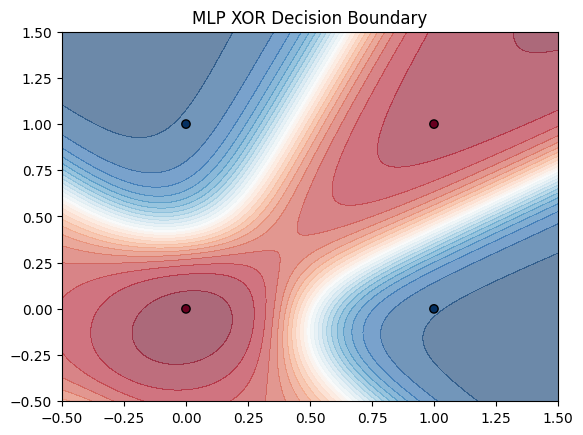

In [4]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.forward(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=25, cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="RdBu", edgecolor="black")
    plt.title("MLP XOR Decision Boundary")
    plt.show()

plot_decision_boundary(mlp, X, y)
